<a href="https://colab.research.google.com/github/n-erfan/Data-Mining-Machine-Learning/blob/main/MiniProject6_Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. a. Assuming a static system:

      $x^{n+1|n} = x^{n|n}$

  $P^{n+1|n} = P^{n|n}$

  Hence, $A = 1, u(n) = 0$

1. b. C is the measurement matrix modifying the state variable x. Since there is only one sesonsor measuring the water level, C = 1.

1. c. The following are given:

 $x^{0|0} = x^{1|0} = 0$

 $P^{0|0} = 1000$

 $Q = q = 0.0001$

 $R = r = 0.1$

 $y(1) = 0.9 $

 $C = 1$

 Covariance prediction at t=1:

 $P^{1|0} = AP^{0|0}A^{T} + Q = 1 ⋅ P^{0|0} ⋅ 1 + q = 1000 + 0.0001 = 1000.0001$

 $K(1) = P^{1|0} C^T [C P^{1|0} C^T + R]^{-1} =  P^{1|0} ⋅ 1 ⋅ [1 ⋅ P^{1|0} ⋅ 1 + r]^{-1} = \frac{1000.001}{1000+0.1} = 0.9999$

 Update x and P:

 $x^{1|1} = x^{1|0} + K(1)[y(1)-Cx^{1|0}] = 0 + 0.9999[0.9 - 1 ⋅ 0] = 0.89991$

 $P^{1|1} = [I - K(n)]P^{1|0} = [1 - 0.9999]1000.0001 = 0.10000001$



1. d. Using Maximum Likelihood:
   
  $\hat{x}_{ML} = [C^T R^{-1} C^{-1}]C^T R^{-1} y = \frac{0.1 \times 0.9}{0.1} = 0.90$

 $\hat{P}_{ML} = [C^T R^{-1} C]^{-1} = (1 ⋅ \frac{1}{0.1} ⋅ 1)^{-1} = 0.10$

 Yes, the values for level and the related covariance calculated via maximum likelihood are quite similar in magnitude as the previous calculations.

 If $P^{0|0} = 10,000$ is used:

 $P^{1|0} = 10000 + 0.0001 = 10000.0001$
 $K(1) = \frac{10000.0001}{10000+0.1}=0.99999$
 $x^{1|1} = 0 + 0.99999[0.90-1⋅0] = 0.899991$
 $P^{1|1} = [1 - 0.99999]10000.0001 = 0.100000001$

 Hence, they do get closer but the magnitude of difference is miniscule.

1. e. According to the grapg below, it takes approximately 5 seconds for the Kalman estimations to reach within the 5% range of the accurate level.It is also observable that the measurements are within +/-20% true level.

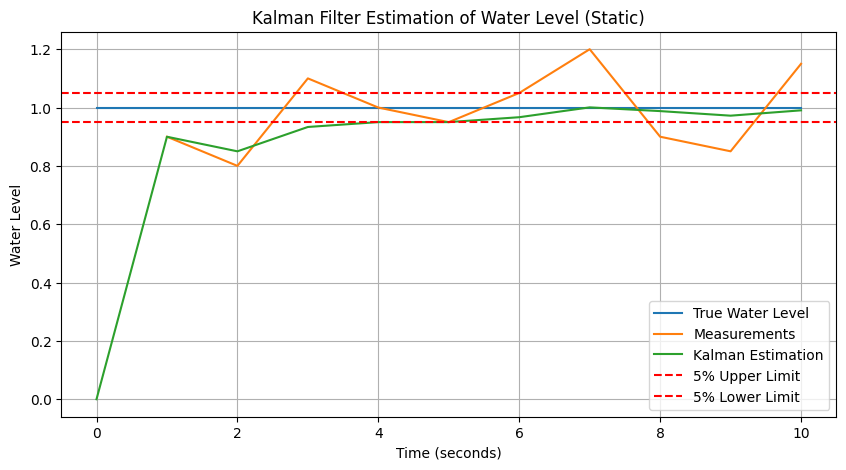

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Initializing the variables
x_h = [0.0]  # The Estimated water-level
x = [1.0] * 11  # The true water-level
P = [1000.0]   # Covariance
y = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]  # Given noisy measurements

Q = q = 0.0001
R = r = 0.1
A = np.array((1))
C = np.array((1))

for i in range(1, len(y)+1):
  # Prediction step
  x_h_pred = np.dot(A, x_h[i-1])
  P_pred = np.dot(np.dot(A, P[i-1]), A.T) + Q # Predict the noise covariance

  # Update step
  K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)  # Kalman gain calculation
  x_h.append(x_h_pred + K * (y[i-1] - x_h_pred))  # Update the state variable
  P.append((1 - K) * P_pred)  # Update the covariance

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(x, label='True Water Level')
plt.plot(range(1, len(y)+1), y, label='Measurements')
plt.plot(x_h, label='Kalman Estimation')

# Marking the 5% range
upper_limit = x[0] * 1.05
lower_limit = x[0] * 0.95
plt.axhline(y=upper_limit, color='r', linestyle='--', label='5% Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='5% Lower Limit')

plt.xlabel('Time (seconds)')
plt.ylabel('Water Level')
plt.title('Kalman Filter Estimation of Water Level (Static)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x_h

[0.0,
 0.8999100090080983,
 0.8499325346135823,
 0.9334243822024225,
 0.9501260390669717,
 0.9501006808387432,
 0.9669024557234711,
 1.0006328088444587,
 0.9878348431990425,
 0.9721750681840763,
 0.9904603252373938]

2. a. Still assuming a static system and updated measurements. Estimations are not close to the actual values and the system displays a biased or systematic error. With time the estimation is diverging away from the true value and so is becoming more and more inaccurate with time. Without changing the dynamics, we could change the q value, i.e. increase the uncertainity to see if the existing system can adapt.

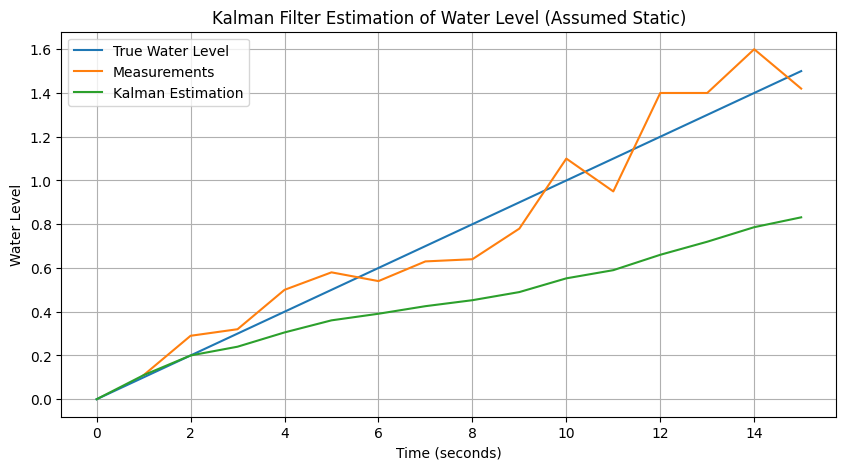

In [ ]:
# Initializing the variables
x_h = [0.0]  # The Estimated water-level
x = np.linspace(0, 1.5, num=16).tolist()  # The true water-level
P = [1000.0]   # Covariance
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]  # Given noisy measurements

Q = q = 0.0001
R = r = 0.1
A = np.array((1))
C = np.array((1))

for i in range(1, len(y)+1):
  # Prediction step
  x_h_pred = np.dot(A, x_h[i-1])
  P_pred = np.dot(np.dot(A, P[i-1]), A.T) + Q # Predict the noise covariance

  # Update step
  K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)  # Kalman gain calculation
  x_h.append(x_h_pred + K * (y[i-1] - x_h_pred))  # Update the state variable
  P.append((1 - K) * P_pred)  # Update the covariance

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(x, label='True Water Level')
plt.plot(range(1, 16), y, label='Measurements')
plt.plot(x_h, label='Kalman Estimation')

plt.xlabel('Time (seconds)')
plt.ylabel('Water Level')
plt.title('Kalman Filter Estimation of Water Level (Assumed Static)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x_h

[0.0,
 0.10998900110098979,
 0.20003498525736496,
 0.2400885792401233,
 0.3052919000400525,
 0.3605613562679672,
 0.39074061797784826,
 0.4253626191154599,
 0.4526591028201748,
 0.4898491534928543,
 0.5525893157173024,
 0.5899702331945973,
 0.6602881168634529,
 0.7199983866266038,
 0.7864800370506246,
 0.8315260641249742]

2. b. With higher q values we can get better estimations which are closer to the true level at the same given time, even when the system was wrongly assumed to be static. The estimations are in fact following the same trend as the noisy measurements with higher q values following closer. This highlights the strength of the Kalman Filter, i.e. tolerance to uncertainty.

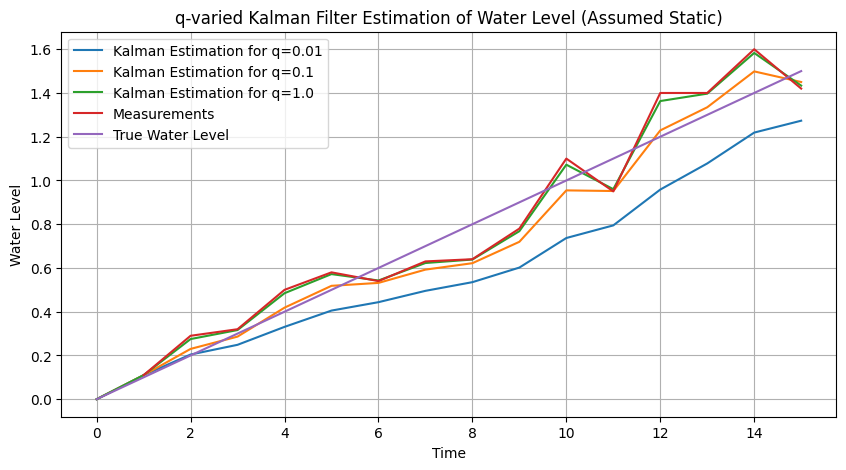

In [ ]:
# Initializing the variables
x = np.linspace(0, 1.5, num=16).tolist()  # The true water-level
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]  # Given noisy measurements

R = r = 0.1
A = np.array((1))
C = np.array((1))

# List of noise covariances
q_list = [0.01, 0.1, 1.0]

# Create Sub-plots
fig, ax = plt.subplots(figsize=(10, 5))

for q in q_list:
  x_h = [0.0]  # The Estimated water-level
  P = [1000.0]   # Covariance
  for i in range(1, len(y)+1):
    # Prediction step
    x_h_pred = np.dot(A, x_h[i-1])
    P_pred = np.dot(np.dot(A, P[i-1]), A.T) + q # Predict the noise covariance

    # Update step
    K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)  # Kalman gain calculation
    x_h.append(x_h_pred + K * (y[i-1] - x_h_pred))  # Update the state variable
    P.append((1 - K) * P_pred)  # Update the covariance
  ax.plot(x_h, label=f'Kalman Estimation for q={q}')

# Plotting the results
ax.plot(range(1, 16), y, label='Measurements')
ax.plot(x, label='True Water Level')
ax.set_xlabel('Time')
ax.set_ylabel('Water Level')
ax.set_title('q-varied Kalman Filter Estimation of Water Level (Assumed Static)')
ax.legend()
ax.grid()
plt.show()

3. a. i. Incorporating the rate of change of water level allows us to give good estimations and emulate a dynamic environment. The estimations are quite close to the true values and converge faster. The Rate of change is ensured by the  dot product of the state transition matrix, A and state variable, x:
 $\begin{bmatrix} 1 & Δt \\ 0 & 1 \end{bmatrix} ⋅ \begin{bmatrix} {x}_{1} \\ {x}_{2} \end{bmatrix}$

 ${x}_{1}^{n+1|n} =  {x}_{1}^{n|n} + {x}_{2}^{n|n}⋅Δt$

 $\therefore {x}_{2} = \frac{{x}_{1}^{n+1|n} - {x}_{1}^{n+1|n}}{Δt}$

 Assuming the measurement matrix, $ C = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ :

 $ y = 1⋅{x}_{1} + 0⋅{x}_{2} + {ɛ}_{m}$ [Measurements only depend on ${x}_{1}$]

 The kalman estimation follows the measurements exactly, as shown by the overlapping lines.

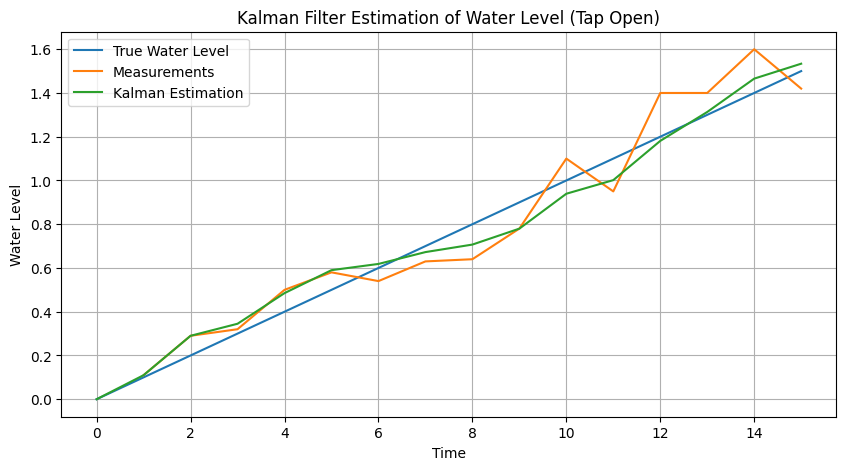

In [ ]:
# Initializing the variables
x_h = [np.array([0, 0]).reshape((2,1))]  # The Estimated water-level
P = [np.array([[1000, 0], [0, 1000]])]  # covariance as a list of covariance matrix
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]  # Given noisy measurements
x = np.linspace(0, 1.5, num=16).tolist()  # The true water-level

A = np.array([[1, 1], [0, 1]])  # State transition matrix
C = np.array([1, 0]).reshape((1,2))  # Measurement matrix
q = 0.0001
Q = np.array([[q/3, q/2], [q/2, q]])  # noise covariance matrix
R = r = 0.1  # Measurement noise covariance

for i in range(1, len(y)+1):
  # Prediction step
  x_h_pred = np.dot(A, x_h[i-1])
  P_pred = np.dot(np.dot(A, P[i-1]), A.T) + Q

  # Update step
  K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)
  x_h.append(x_h_pred + np.dot(K, y[i-1] - np.dot(C, x_h_pred)))
  P.append(np.dot(np.eye(2) - np.dot(K, C), P_pred))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, label='True Water Level')
plt.plot(range(1, 16), y, label='Measurements')
plt.plot([x[0] for x in x_h], label='Kalman Estimation')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.title('Kalman Filter Estimation of Water Level (Tap Open)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x_h

[array([[0],
        [0]]),
 array([[0.1099945 ],
        [0.05499725]]),
 array([[0.28997501],
        [0.17994304]]),
 array([[0.34499397],
        [0.10498525]]),
 array([[0.4849974 ],
        [0.12000335]]),
 array([[0.58999281],
        [0.11498965]]),
 array([[0.61844752],
        [0.0912657 ]]),
 array([[0.67259719],
        [0.08261056]]),
 array([[0.70694476],
        [0.07277597]]),
 array([[0.77982721],
        [0.07279535]]),
 array([[0.93935561],
        [0.08715595]]),
 array([[1.00161463],
        [0.08334333]]),
 array([[1.1809211],
        [0.0971377]]),
 array([[1.31310935],
        [0.10193089]]),
 array([[1.46559091],
        [0.1085864 ]]),
 array([[1.53382311],
        [0.10341756]])]

3. a. ii. Assuming the measurement matrix, $ C = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ :

 $ y = 1⋅{x}_{1} + 1⋅{x}_{2} + {ɛ}_{m}$ [Measurements depend on both ${x}_1$ & ${x}_{1}$]

 However, this is an impractical assumption as we cannot directly measure the rate of change of ${x}_{1}$.

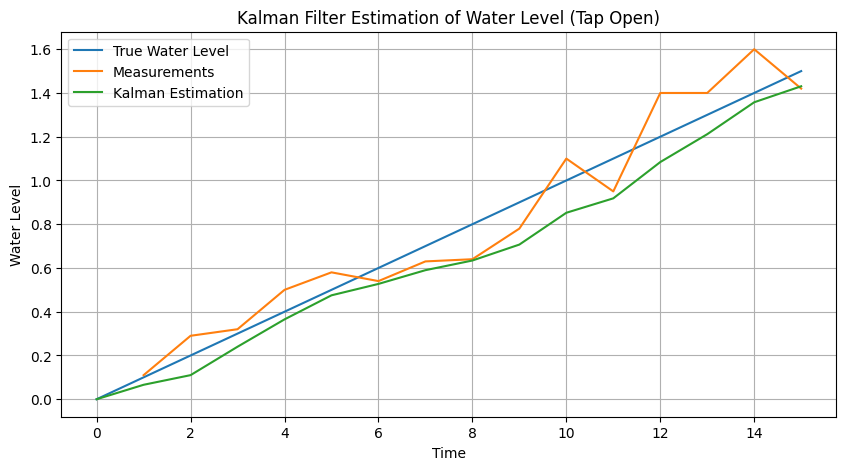

In [ ]:
# Initializing the variables
x_h = [np.array([0, 0]).reshape((2,1))]  # The Estimated water-level
P = [np.array([[1000, 0], [0, 1000]])]  # covariance as a list of covariance matrix
y = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]  # Given noisy measurements
x = np.linspace(0, 1.5, num=16).tolist()  # The true water-level

A = np.array([[1, 1], [0, 1]])  # State transition matrix
C = np.array([1, 1]).reshape((1,2))  # Measurement matrix
q = 0.0001
Q = np.array([[q/3, q/2], [q/2, q]])  # noise covariance matrix
R = r = 0.1  # Measurement noise covariance

for i in range(1, len(y)+1):
  # Prediction step
  x_h_pred = np.dot(A, x_h[i-1])
  P_pred = np.dot(np.dot(A, P[i-1]), A.T) + Q

  # Update step
  K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)
  x_h.append(x_h_pred + np.dot(K, y[i-1] - np.dot(C, x_h_pred)))
  P.append(np.dot(np.eye(2) - np.dot(K, C), P_pred))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, label='True Water Level')
plt.plot(range(1, 16), y, label='Measurements')
plt.plot([x[0] for x in x_h], label='Kalman Estimation')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.title('Kalman Filter Estimation of Water Level (Tap Open)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x_h

[array([[0],
        [0]]),
 array([[0.06599868],
        [0.04399912]]),
 array([[0.11009292],
        [0.17983918]]),
 array([[0.24000389],
        [0.104971  ]]),
 array([[0.3649944 ],
        [0.11999806]]),
 array([[0.47499702],
        [0.11498621]]),
 array([[0.5271254 ],
        [0.09126047]]),
 array([[0.58991523],
        [0.0826101 ]]),
 array([[0.63405958],
        [0.07277741]]),
 array([[0.70695751],
        [0.07280418]]),
 array([[0.85233872],
        [0.08717876]]),
 array([[0.91831552],
        [0.08335358]]),
 array([[1.08412872],
        [0.09715865]]),
 array([[1.21157969],
        [0.10194158]]),
 array([[1.35753239],
        [0.10858877]]),
 array([[1.43061978],
        [0.10339702]])]

3. b. i. Assuming someone closes the tap when level was 1 without informing. The graph shows if the system was able to handle this scenario. Assuming the same 10 noisy readings as in 1.e. It seems that the system was able to adapt. After 3 seconds, the system remains within 15% of the true level.

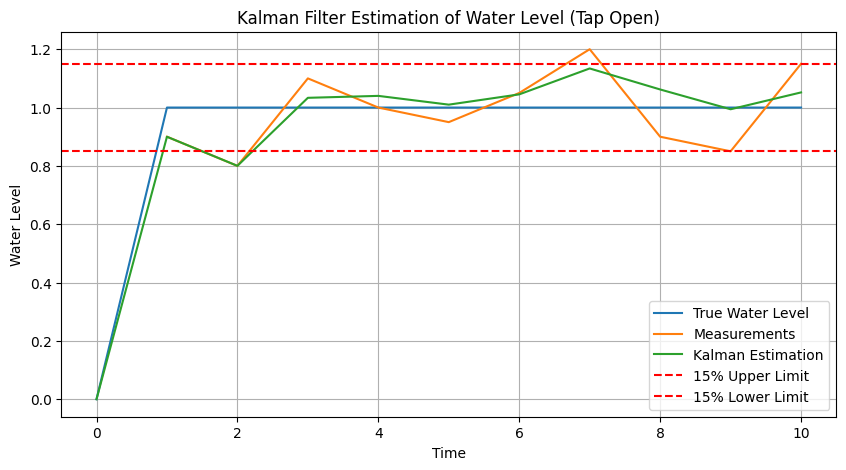

In [ ]:
# Initializing the variables
x_h = [np.array([0, 0]).reshape((2,1))]  # The Estimated water-level
P = [np.array([[1000, 0], [0, 1000]])]  # covariance as a list of covariance matrix
y = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]  # Given noisy measurements +/- 0.2
x = [0] + [1] * 10 # True water level (constant at 1.0 after the tap is closed)

A = np.array([[1, 1], [0, 1]])  # State transition matrix
C = np.array([1, 0]).reshape((1,2))  # Measurement matrix with x1 = 1, x2 = 0 as can only measure x1 directly
q = 0.0001
Q = np.array([[q/3, q/2], [q/2, q]])  # noise covariance matrix
R = r = 0.1  # Measurement noise covariance

for i in range(1, len(y)+1):
  # Prediction step
  x_h_pred = np.dot(A, x_h[i-1])
  P_pred = np.dot(np.dot(A, P[i-1]), A.T) + Q

  # Update step
  K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)
  x_h.append(x_h_pred + np.dot(K, y[i-1] - np.dot(C, x_h_pred)))
  P.append(np.dot(np.eye(2) - np.dot(K, C), P_pred))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, label='True Water Level')
plt.plot(range(1, len(y)+1), y, label='Measurements')
plt.plot([x[0] for x in x_h], label='Kalman Estimation')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.title('Kalman Filter Estimation of Water Level (Tap Open)')
# Marking the 10% range
upper_limit = x[1] * 1.15
lower_limit = x[1] * 0.85
plt.axhline(y=upper_limit, color='r', linestyle='--', label='15% Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='15% Lower Limit')

plt.legend()
plt.grid()
plt.show()

In [ ]:
x_h

[array([[0],
        [0]]),
 array([[0.53998919],
        [0.35999281]]),
 array([[ 0.89966031],
        [-0.09943066]]),
 array([[0.9333085],
        [0.1001233]]),
 array([[0.98001545],
        [0.0600279 ]]),
 array([[0.98001945],
        [0.02993113]]),
 array([[1.01380592],
        [0.03138633]]),
 array([[1.08931087],
        [0.0447911 ]]),
 array([[1.0409262 ],
        [0.02097332]]),
 array([[0.98911519],
        [0.00480501]]),
 array([[1.03829191],
        [0.01359325]])]

3. b. ii. with $ C = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, we can see that the system was also able to adapt. After 3 seconds, the system remains within 10% of the true level.

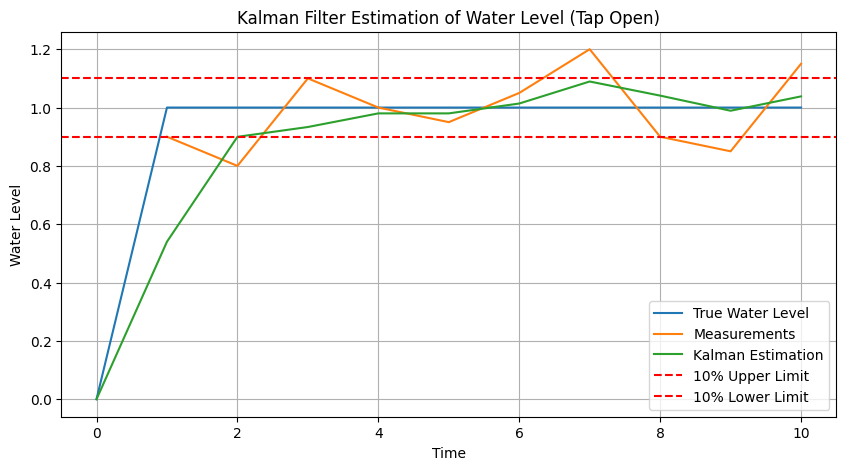

In [ ]:
# Initializing the variables
x_h = [np.array([0, 0]).reshape((2,1))]  # The Estimated water-level
P = [np.array([[1000, 0], [0, 1000]])]  # covariance as a list of covariance matrix
y = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]  # Given noisy measurements +/- 0.2
x = [0] + [1] * 10 # True water level (constant at 1.0 after the tap is closed)

A = np.array([[1, 1], [0, 1]])  # State transition matrix
C = np.array([1, 1]).reshape((1,2))  # Measurement matrix with x1 = 1, x2 = 1
q = 0.0001
Q = np.array([[q/3, q/2], [q/2, q]])  # noise covariance matrix
R = r = 0.1  # Measurement noise covariance

for i in range(1, len(y)+1):
  # Prediction step
  x_h_pred = np.dot(A, x_h[i-1])
  P_pred = np.dot(np.dot(A, P[i-1]), A.T) + Q

  # Update step
  K = np.dot(P_pred, C.T) / (np.dot(np.dot(C, P_pred), C.T) + R)
  x_h.append(x_h_pred + np.dot(K, y[i-1] - np.dot(C, x_h_pred)))
  P.append(np.dot(np.eye(2) - np.dot(K, C), P_pred))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, label='True Water Level')
plt.plot(range(1, len(y)+1), y, label='Measurements')
plt.plot([x[0] for x in x_h], label='Kalman Estimation')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.title('Kalman Filter Estimation of Water Level (Tap Open)')
# Marking the 10% range
upper_limit = x[1] * 1.10
lower_limit = x[1] * 0.90
plt.axhline(y=upper_limit, color='r', linestyle='--', label='10% Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='10% Lower Limit')

plt.legend()
plt.grid()
plt.show()

In [ ]:
x_h

[array([[0],
        [0]]),
 array([[0.53998919],
        [0.35999281]]),
 array([[ 0.89966031],
        [-0.09943066]]),
 array([[0.9333085],
        [0.1001233]]),
 array([[0.98001545],
        [0.0600279 ]]),
 array([[0.98001945],
        [0.02993113]]),
 array([[1.01380592],
        [0.03138633]]),
 array([[1.08931087],
        [0.0447911 ]]),
 array([[1.0409262 ],
        [0.02097332]]),
 array([[0.98911519],
        [0.00480501]]),
 array([[1.03829191],
        [0.01359325]])]